In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wn
wn.filterwarnings("ignore")
from pdpbox import pdp,get_dataset,info_plots

df=pd.read_csv('train1.csv')
df

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood,team_total_assists,Total game time
0,0,0,1,5,2,0,1,569,0,0,...,0,7819,2178,5239,401,4,1,0,20,2450
1,1,0,5,8,7,3,1,880,0,0,...,0,24637,5607,17635,1394,10,0,0,21,2357
2,2,1,1,6,16,0,1,593,0,0,...,0,18749,3651,14834,263,7,1,0,23,2047
3,3,0,1,2,0,0,1,381,0,0,...,0,12134,1739,10318,76,8,1,0,39,1883
4,4,0,4,11,25,0,1,455,0,0,...,0,27891,14068,12749,1073,34,2,0,22,1830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,1,1,6,12,0,1,362,0,0,...,0,14786,2374,12309,102,12,1,0,37,2325
179996,179996,1,7,3,4,5,1,574,0,0,...,0,11019,3933,6533,552,7,2,0,31,1350
179997,179997,1,9,0,9,9,1,0,0,0,...,0,14279,3661,10617,0,7,2,1,27,2275
179998,179998,1,14,1,5,10,2,980,3,0,...,0,19165,4818,14110,236,6,0,0,38,2165


In [2]:
df=pd.get_dummies(df)
df.columns

Index(['id', 'win', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'longesttimespentliving', 'doublekills',
       'triplekills', 'quadrakills', 'pentakills', 'totdmgdealt',
       'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit',
       'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp',
       'totheal', 'totunitshealed', 'dmgtoturrets', 'timecc', 'totdmgtaken',
       'magicdmgtaken', 'physdmgtaken', 'truedmgtaken', 'wardsplaced',
       'wardskilled', 'firstblood', 'team_total_assists', 'Total game time'],
      dtype='object')

In [3]:
X=df.drop('win',axis=1)
y=df['win']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [4]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(X_train,y_train)
feature_names=X_train.columns
y_train_str=y_train.astype("str")
y_train_str[y_train_str=='0']='no win'
y_train_str[y_train_str=='1']='win'
y_train_str=y_train_str.values

In [5]:
model.feature_importances_

array([2.15999057e-05, 5.91172413e-02, 1.95017250e-01, 1.50898952e-01,
       7.29107229e-02, 2.14227619e-02, 1.45481212e-02, 1.78953551e-02,
       1.76498155e-03, 7.89383723e-05, 0.00000000e+00, 1.65638898e-02,
       1.45193739e-03, 6.60727197e-03, 8.27809652e-03, 2.32240443e-03,
       1.05433591e-02, 3.81027812e-03, 3.38215317e-03, 8.70544466e-04,
       1.16638885e-02, 4.16521615e-03, 3.09416840e-01, 0.00000000e+00,
       3.70787885e-02, 2.21998244e-02, 1.07383855e-02, 1.06320320e-02,
       5.65114562e-03, 8.87353535e-04, 2.20084031e-05, 1.00292254e-05,
       2.86285118e-05])

## 特征权重排序 

In [6]:
#特征排序
print("特征排序")
feature_names=X_test.columns
feature_importances=model.feature_importances_
indices=np.argsort(feature_importances)[::-1]
# print(indices)
for index in indices:
    print("feature %s (%f)"%(feature_names[index],feature_importances[index]))

特征排序
feature dmgtoturrets (0.309417)
feature deaths (0.195017)
feature assists (0.150899)
feature largestkillingspree (0.072911)
feature kills (0.059117)
feature totdmgtaken (0.037079)
feature magicdmgtaken (0.022200)
feature largestmultikill (0.021423)
feature doublekills (0.017895)
feature totdmgdealt (0.016564)
feature longesttimespentliving (0.014548)
feature totheal (0.011664)
feature physdmgtaken (0.010738)
feature truedmgtaken (0.010632)
feature totdmgtochamp (0.010543)
feature truedmgdealt (0.008278)
feature physicaldmgdealt (0.006607)
feature wardsplaced (0.005651)
feature totunitshealed (0.004165)
feature magicdmgtochamp (0.003810)
feature physdmgtochamp (0.003382)
feature largestcrit (0.002322)
feature triplekills (0.001765)
feature magicdmgdealt (0.001452)
feature wardskilled (0.000887)
feature truedmgtochamp (0.000871)
feature quadrakills (0.000079)
feature Total game time (0.000029)
feature firstblood (0.000022)
feature id (0.000022)
feature team_total_assists (0.000010)


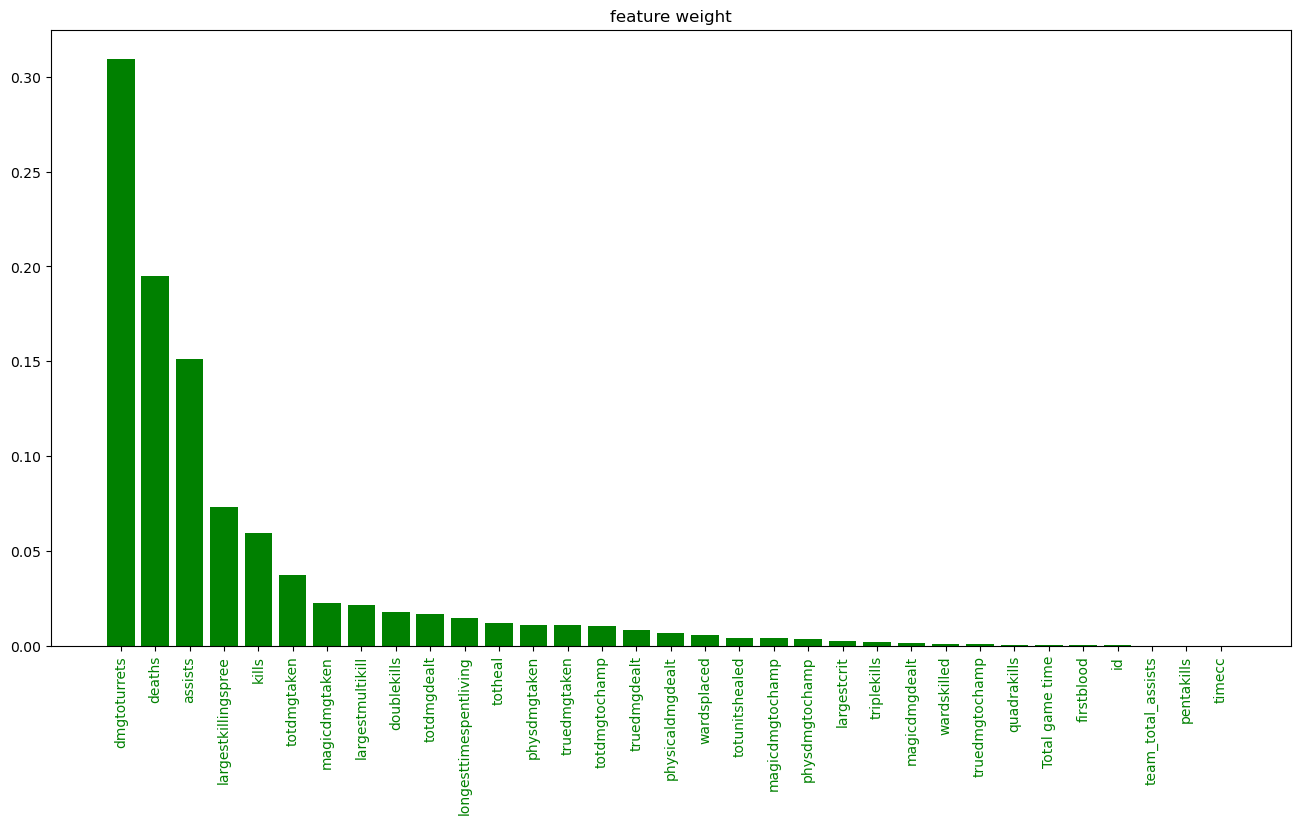

In [7]:
plt.figure(figsize=(16,8))
plt.title("feature weight")
plt.bar(range(len(feature_importances)),feature_importances[indices],color="g")
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color="g",rotation=90)
plt.savefig('pic/特征权重排序.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
model.predict(X_test)
model.predict_proba(X_test)

array([[0.18635875, 0.81364125],
       [0.19490588, 0.80509412],
       [0.2825968 , 0.7174032 ],
       ...,
       [0.29643794, 0.70356206],
       [0.30674807, 0.69325193],
       [0.4300468 , 0.5699532 ]])

In [9]:
model.predict_proba(X_test)[:,1]

array([0.81364125, 0.80509412, 0.7174032 , ..., 0.70356206, 0.69325193,
       0.5699532 ])

In [10]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

In [11]:
#评估模块
from sklearn.metrics import confusion_matrix
confusion_matrix_model=confusion_matrix(y_test,y_pred)
confusion_matrix_model

array([[15070,  3127],
       [ 3927, 13876]], dtype=int64)

In [12]:
#混淆矩阵模板
import itertools
def cnf_matrix_plotter(cm,classes):
    #传入混淆矩阵和标签名称列表，绘制混淆矩阵
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Oranges)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
   
    threshold=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j] > threshold else "black",fontsize=25)
       
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predict Label")
    plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=["nowin","win"]))

              precision    recall  f1-score   support

       nowin       0.79      0.83      0.81     18197
         win       0.82      0.78      0.80     17803

    accuracy                           0.80     36000
   macro avg       0.80      0.80      0.80     36000
weighted avg       0.80      0.80      0.80     36000



In [14]:
y_pred_quant=model.predict_proba(X_test)[:,1]
y_pred_quant
#win的概率

array([0.81364125, 0.80509412, 0.7174032 , ..., 0.70356206, 0.69325193,
       0.5699532 ])

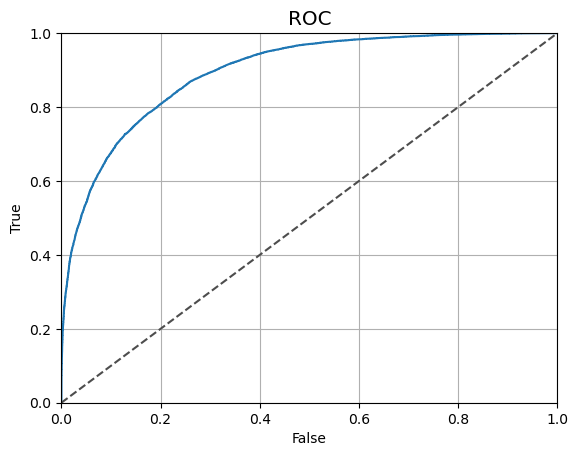

In [15]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred_quant)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls="--",c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams["font.size"]=12
plt.title("ROC")
plt.xlabel("False")
plt.ylabel("True")
plt.grid(True)
plt.savefig('pic/随机森林ROC.png', dpi=300, bbox_inches='tight')

In [16]:
auc(fpr,tpr)

0.8953046662925745

## shap权重排序 

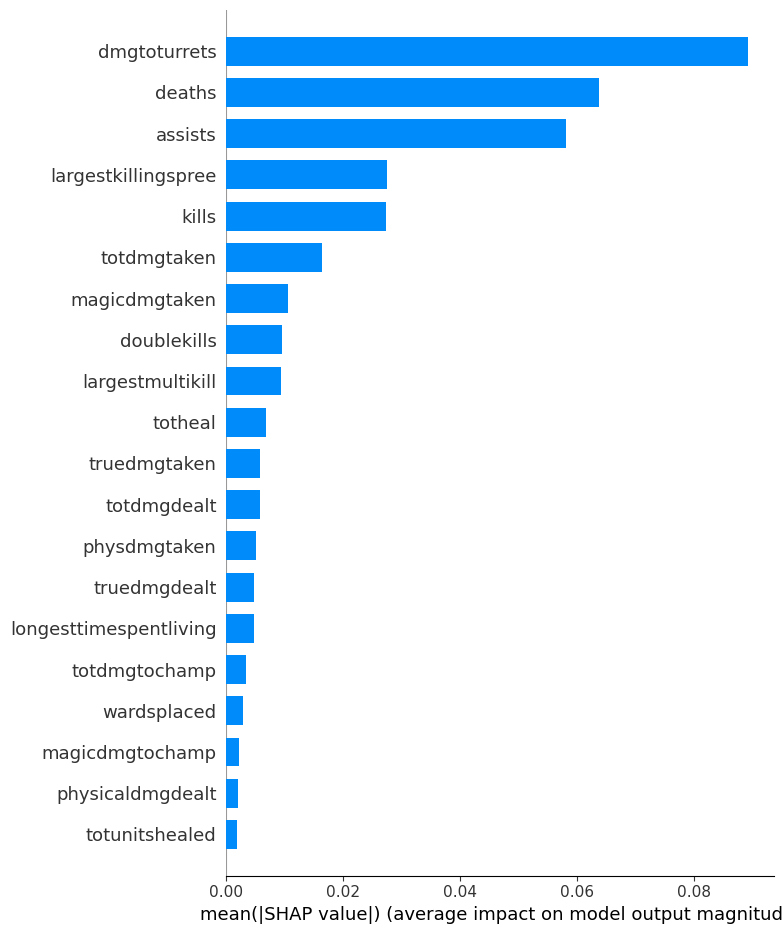

In [17]:
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)
fig = plt.figure(1)
shap.summary_plot(shap_values[1],X_test,plot_type='bar',show=False)
save_path = 'pic/shap值排序.png' # 设置保存路径

fig.savefig(save_path) # 保存图像
# plt.close(fig) # 关闭figure对象

## shap正负贡献值图

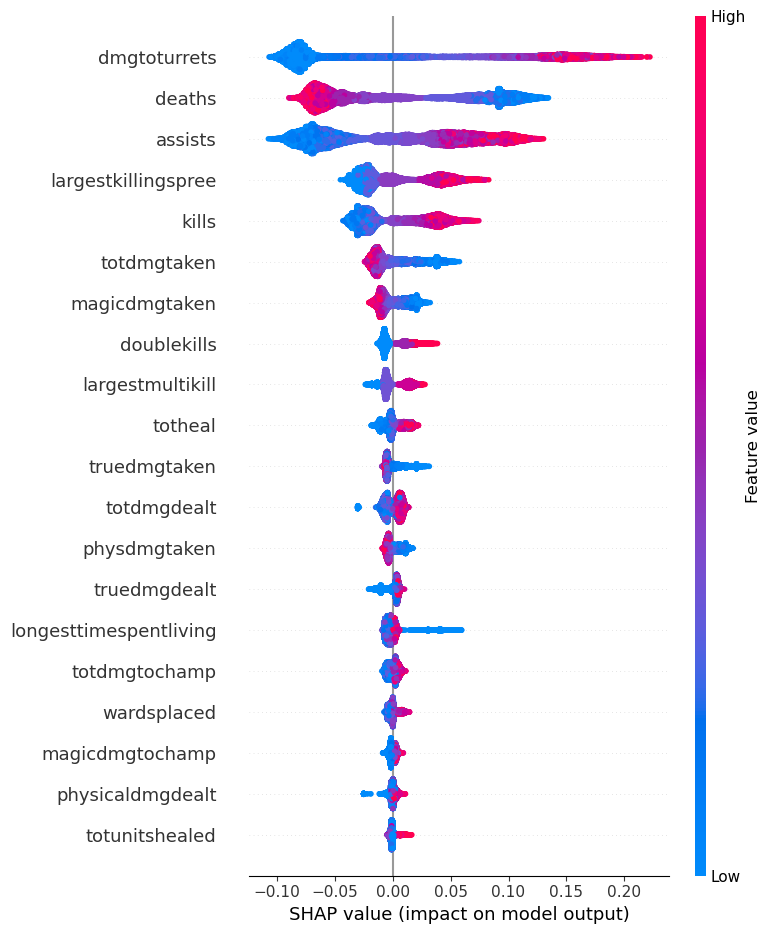

In [18]:

shap.summary_plot(shap_values[1],X_test)

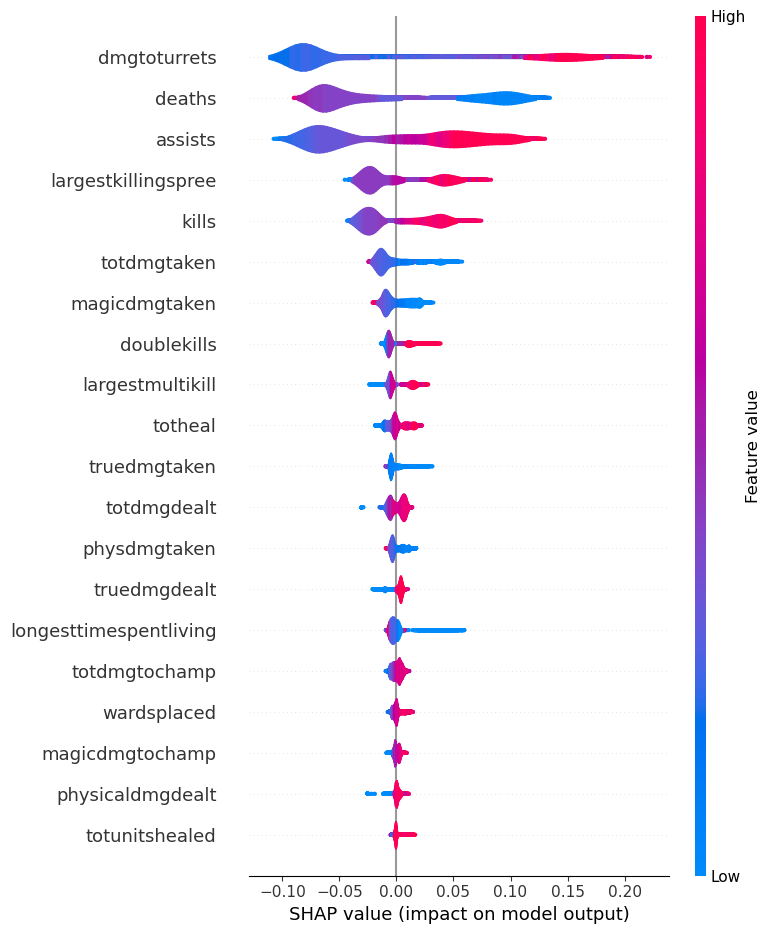

In [19]:
fig = plt.figure(2)
shap.summary_plot(shap_values[1],X_test,plot_type="violin")

save_path = 'pic/shap值小提琴图.png' # 设置保存路径

fig.savefig(save_path) # 保存图像
# plt.close(fig) # 关闭figure对象

In [20]:
base_features=df.columns.values.tolist()
base_features.remove("win")

In [21]:
# id：玩家记录id
# win：是否胜利，标签变量
# kills：击杀次数
# deaths：死亡次数
# assists：助攻次数
# largestkillingspree：最大 killing spree（游戏术语，意味大杀特杀。当你连续杀死三个对方英雄而中途没有死亡时）
# largestmultikill：最大mult ikill（游戏术语，短时间内多重击杀）
# longesttimespentliving：最长存活时间
# doublekills：doublekills次数
# triplekills：doublekills次数
# quadrakills：quadrakills次数
# pentakills：pentakills次数
# totdmgdealt：总伤害
# magicdmgdealt：魔法伤害
# physicaldmgdealt：物理伤害
# truedmgdealt：真实伤害
# largestcrit：最大暴击伤害
# totdmgtochamp：对对方玩家的伤害
# magicdmgtochamp：对对方玩家的魔法伤害
# physdmgtochamp：对对方玩家的物理伤害
# truedmgtochamp：对对方玩家的真实伤害
# totheal：治疗量
# totunitshealed：痊愈的总单位
# dmgtoturrets：对炮塔的伤害
# timecc：法控时间
# totdmgtaken：承受的伤害
# magicdmgtaken：承受的魔法伤害
# physdmgtaken：承受的物理伤害
# truedmgtaken：承受的真实伤害
# wardsplaced：侦查守卫放置次数
# wardskilled：侦查守卫摧毁次数
# # firstblood：是否为firstblood 测试集中label字段win为空，需要选手预测。